In [1]:
# TODO: short markdown readme on what this notebook does

In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [10]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}/'
results_dump = f'{full_path}/results_dump.json'

print('Reading from results folder:', full_path)

Reading from results folder: results/res_2024_03_08_T18_27_39/


In [11]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

results_df = json_to_df(results_dump)
results_df.head()

,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,experiment,homogeneity_score,log_time,n_points,noise,normalized_mutual_info_score,time,timed_out,v_measure_score,variant
0,0.928602,0.959996,0.929259,Standardisation,0.928991,2024-03-08 18:27:39.459483,100,0.0,0.929125,0.147869,False,0.929125,none
1,1.000000,1.000000,1.000000,Standardisation,1.000000,2024-03-08 18:27:39.654912,100,0.0,1.000000,0.010066,False,1.000000,none
2,0.928602,0.959996,0.929259,Standardisation,0.928991,2024-03-08 18:27:39.714808,100,0.0,0.929125,0.007036,False,0.929125,none
3,1.000000,1.000000,1.000000,Standardisation,1.000000,2024-03-08 18:27:39.758794,200,0.0,1.000000,0.024548,False,1.000000,none
4,0.928867,0.960200,0.929259,Standardisation,0.928991,2024-03-08 18:27:39.832748,200,0.0,0.929125,0.037002,False,0.929125,none


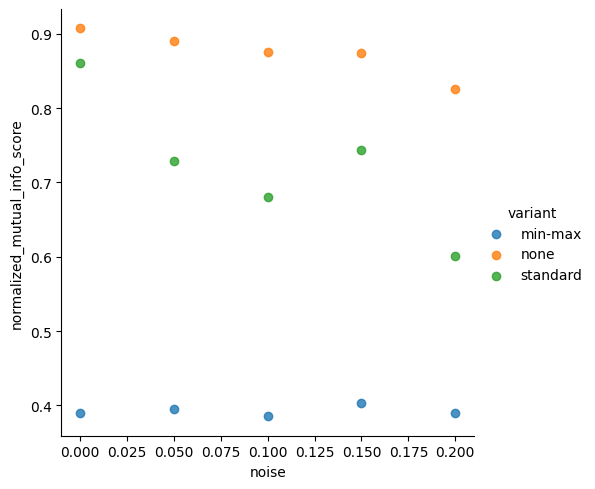

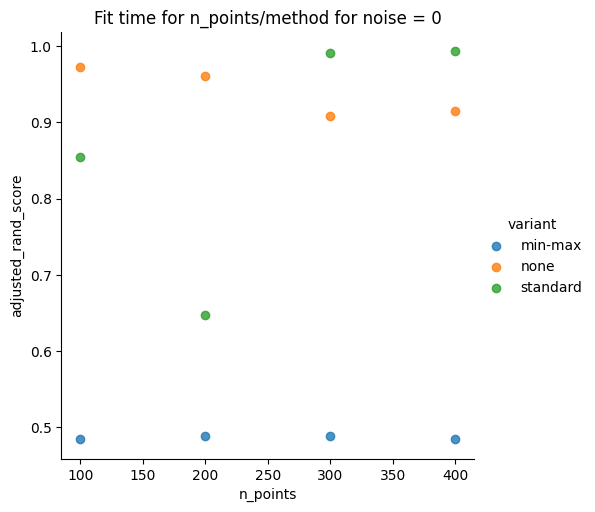

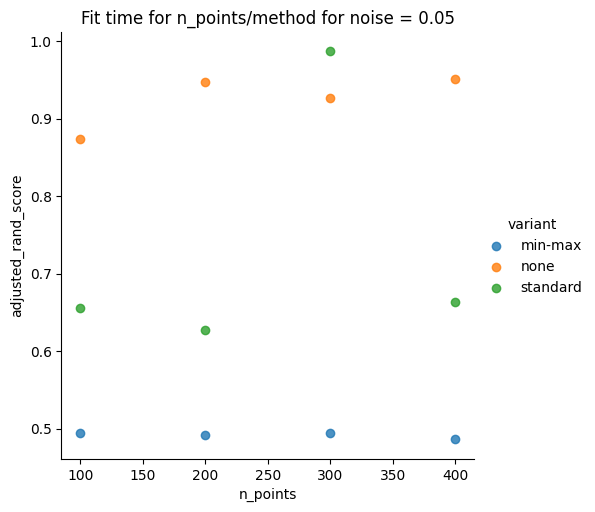

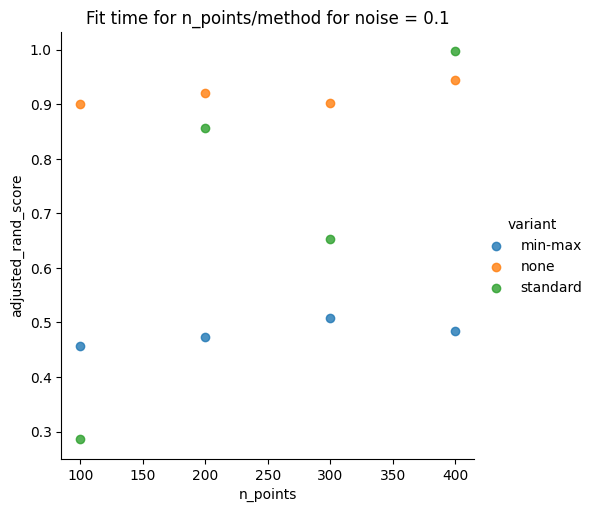

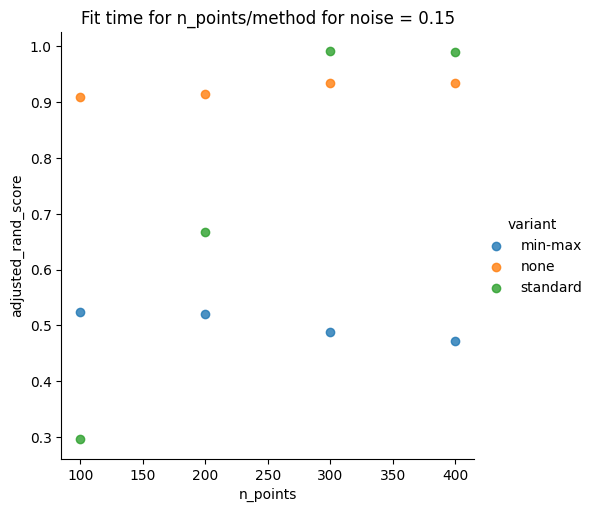

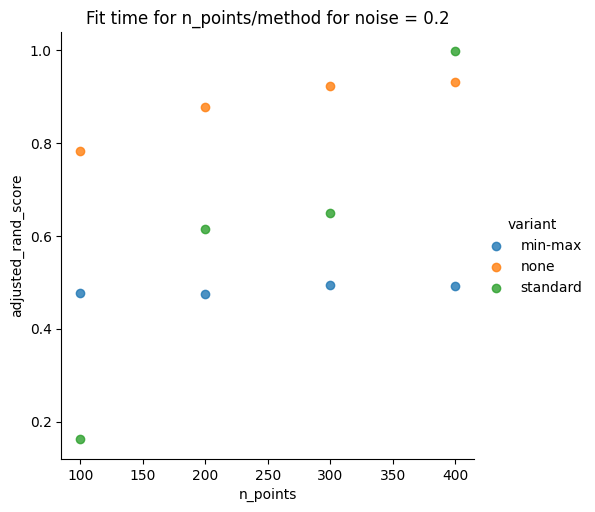

In [15]:
summarised = results_df[(results_df['experiment'] == 'Standardisation')]
summarised = summarised.groupby(['noise', 'variant']).mean(True).reset_index()
sns.lmplot( x="noise", y="normalized_mutual_info_score", data=summarised, fit_reg=False, hue='variant', legend=True)
plt.show()

for noise in [0, 0.05, 0.1, 0.15, 0.2]:
    time_summarised = results_df[(results_df['experiment'] == 'Standardisation') & (results_df['noise'] == noise)]
    time_summarised = time_summarised.groupby(['n_points', 'variant']).mean(True).reset_index()
    sns.lmplot( x="n_points", y="adjusted_rand_score", data=time_summarised, fit_reg=False, hue='variant', legend=True)
    plt.title(f'Fit time for n_points/method for noise = {noise}')
    plt.show()

# sns.lmplot( x="n_points", y="adjusted_rand_score", data=refinement_results, fit_reg=False, hue='variant', legend=True)

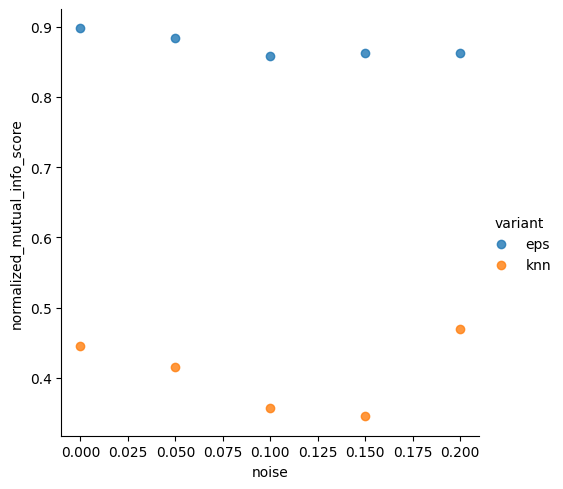

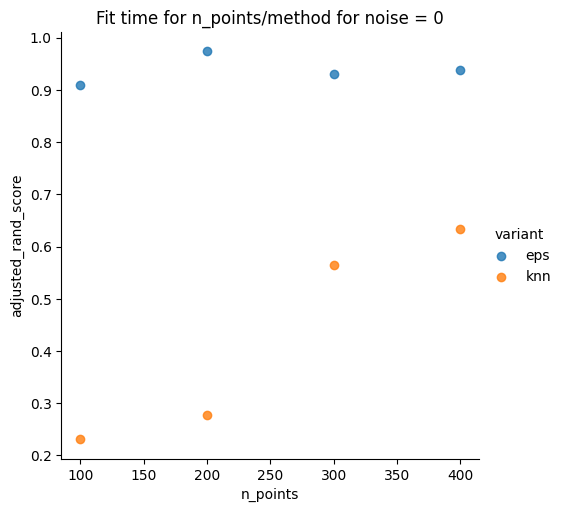

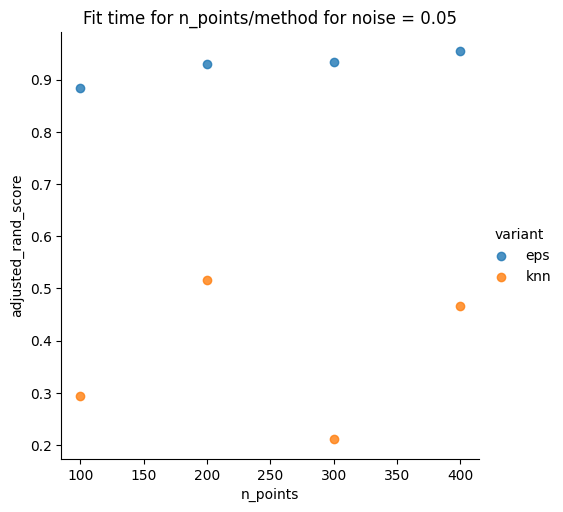

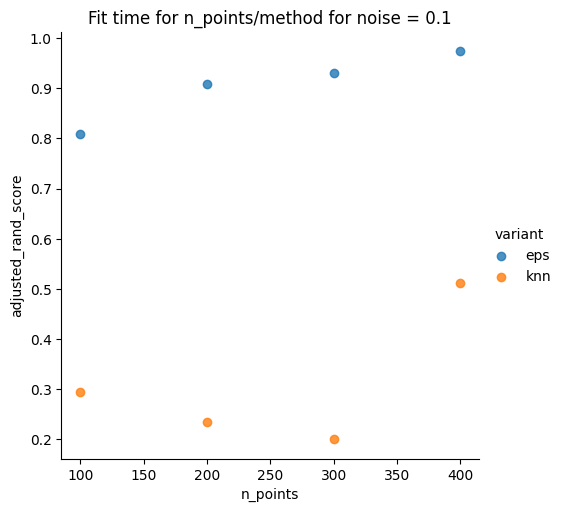

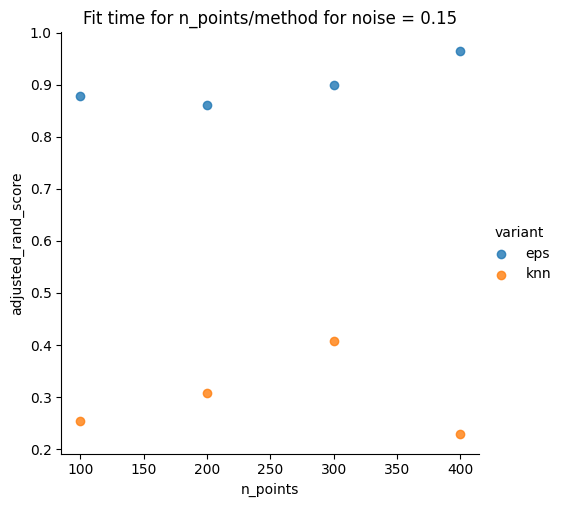

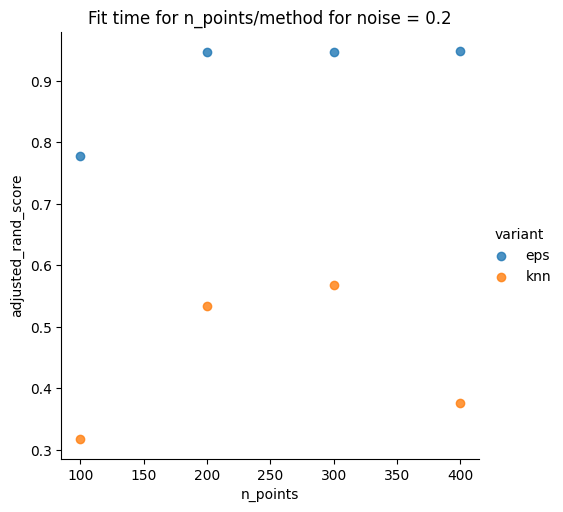

In [255]:
refinement_results = results_df[results_df['experiment'] == 'Refinement']


summarised = results_df[(results_df['experiment'] == 'Refinement')]
summarised = summarised.groupby(['noise', 'variant']).mean(True).reset_index()
sns.lmplot( x="noise", y="normalized_mutual_info_score", data=summarised, fit_reg=False, hue='variant', legend=True)
plt.show()

for noise in [0, 0.05, 0.1, 0.15, 0.2]:
    time_summarised = results_df[(results_df['experiment'] == 'Refinement') & (results_df['noise'] == noise)]
    time_summarised = time_summarised.groupby(['n_points', 'variant']).mean(True).reset_index()
    sns.lmplot( x="n_points", y="adjusted_rand_score", data=time_summarised, fit_reg=False, hue='variant', legend=True)
    plt.title(f'Fit time for n_points/method for noise = {noise}')
    plt.show()

# sns.lmplot( x="n_points", y="adjusted_rand_score", data=refinement_results, fit_reg=False, hue='variant', legend=True)

,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,experiment,homogeneity_score,log_time,n_points,noise,normalized_mutual_info_score,time,timed_out,v_measure_score,variant
0,0.439812,0.457348,0.457542,Laplacian,0.431317,2024-03-08 12:23:56.788208,100,0.0,0.444043,0.152188,False,0.444043,standard
1,0.759256,0.808081,0.763795,Laplacian,0.758277,2024-03-08 12:23:56.975563,100,0.0,0.761026,0.181751,False,0.761026,standard
2,0.857516,0.920800,0.858559,Laplacian,0.858559,2024-03-08 12:23:57.035679,100,0.0,0.858559,0.030174,False,0.858559,standard
3,0.959418,0.980000,0.959601,Laplacian,0.959531,2024-03-08 12:23:57.149483,200,0.0,0.959566,0.071114,False,0.959566,standard
4,0.888438,0.940602,0.888875,Laplacian,0.888811,2024-03-08 12:23:57.292317,200,0.0,0.888843,0.077693,False,0.888843,standard


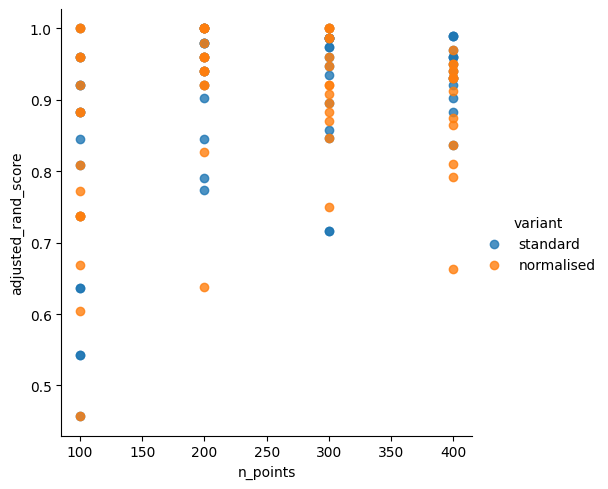

In [234]:
laplacian_results = results_df[results_df['experiment'] == 'Laplacian']
# display(laplacian_results.head())
sns.lmplot( x="n_points", y="adjusted_rand_score", data=laplacian_results, fit_reg=False, hue='variant', legend=True)

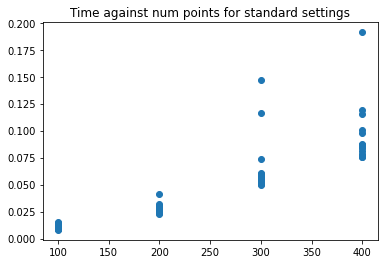

In [4]:
standard_results = results_df[results_df['experiment'] == 'DEFAULT']
plt.title('Time against num points for standard settings')
plt.scatter(standard_results['n_points'], standard_results['time'])

In [6]:
# TODO: add basic set of plots for set of results (correctness/time), from selected(or last) result report

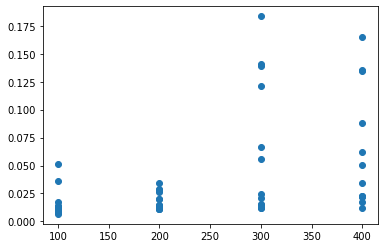

In [6]:
test = results_df[(results_df['experiment'] == 'Decomposition') & (results_df['noise'] == 0.15)]

plt.scatter(test['n_points'], test['time'])
plt.show()

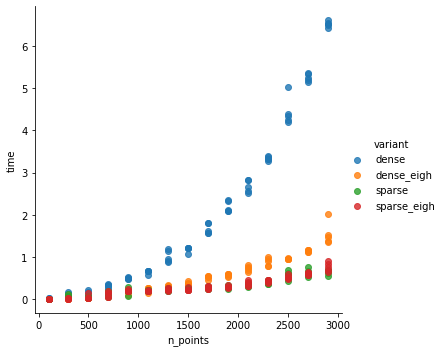

In [9]:
sns.lmplot( x="n_points", y="time", data=test, fit_reg=False, hue='variant', legend=True)

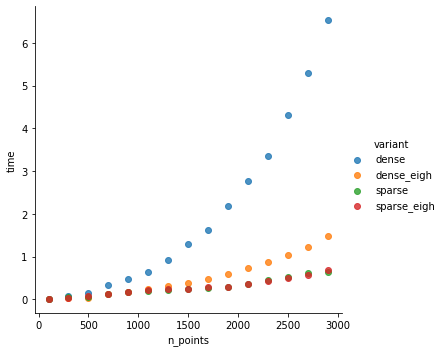

In [21]:
time_summarised = times_df[(times_df['experiment'] == 'Decomposition')]
time_summarised = time_summarised.groupby(['n_points', 'variant']).mean(True).reset_index()
sns.lmplot( x="n_points", y="time", data=time_summarised, fit_reg=False, hue='variant', legend=True)
plt.show()

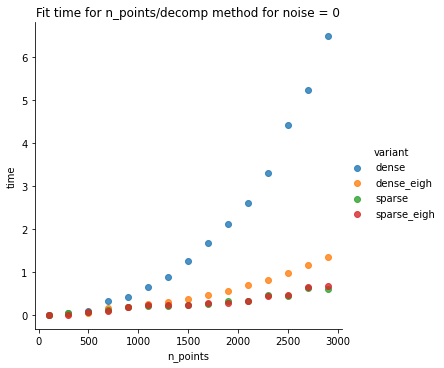

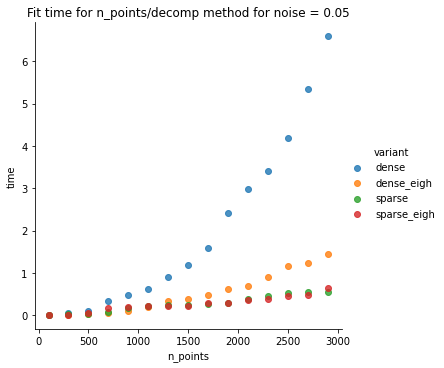

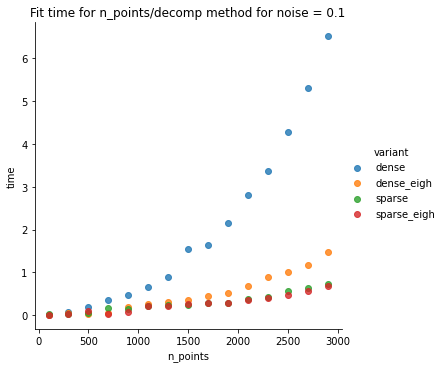

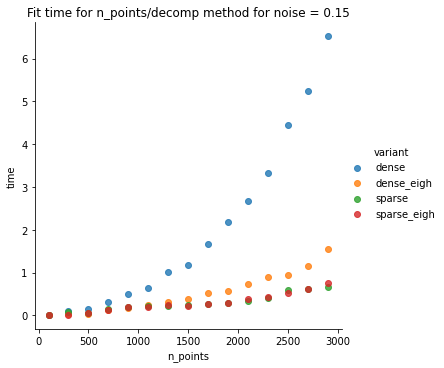

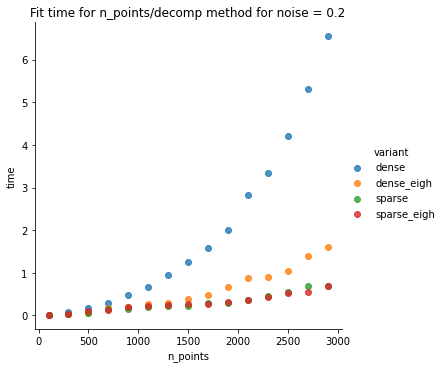

In [18]:
for noise in [0, 0.05, 0.1, 0.15, 0.2]:
    time_summarised = times_df[(times_df['experiment'] == 'Decomposition') & (times_df['noise'] == noise)]
    time_summarised = time_summarised.groupby(['n_points', 'variant']).mean(True).reset_index()
    sns.lmplot( x="n_points", y="time", data=time_summarised, fit_reg=False, hue='variant', legend=True)
    plt.title(f'Fit time for n_points/decomp method for noise = {noise}')
    plt.show()

In [1]:
test = correctness_df[(correctness_df['experiment'] == 'Decomposition') & (correctness_df['noise'] == 0.15)]
sns.lmplot( x="n_points", y="adjusted_rand_score", data=test, fit_reg=False, hue='variant', legend=True)

NameError: name 'correctness_df' is not defined